# Kaggle タイタニックの Survived に影響を与える要因

In [1]:
#Kaggleでのタイタニック号の生存者予測コンペのデータを使い、生存する確率に影響をもたらす可能性があるものをデータから推測します。

## データと必要なモジュールのインポート

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/Users/leo/samurai/kaggle/titanic/data/train.csv")

In [4]:
train.head()#データのプレビュー

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isna().sum()#情報がないcolumnをチェック

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## データを部分化してSurvivedとの関連性を探す

### Pclass

In [6]:
trainpclass = train[["Pclass", "Survived"]]#PclassとSurvivedを抽出

In [7]:
trainpclass.head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [8]:
trainpclass.describe()

,Pclass,Survived
count,891.000000,891.000000
mean,2.308642,0.383838
std,0.836071,0.486592
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [9]:
#Pclassの平均は2.3。１、２、３とチケットのグレードは下がる

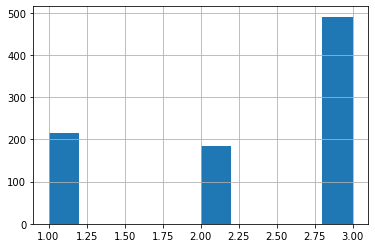

In [10]:
trainpclass["Pclass"].hist()
plt.show()#ヒストグラムを使いデータを可視化

In [11]:
#断然的にチケットクラス３の客が多かった。

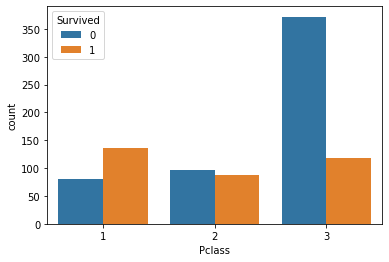

In [12]:
sns.countplot(x="Pclass", hue="Survived", data=train )
plt.show()#SurvivedとPclassを一緒にしたバーグラフを作成

In [13]:
#チケットクラス３が圧倒的に死亡率が高かった。安いチケットの場合船の下の方に部屋があったらしく、そのせいで逃げ遅れたのかもしれない

In [14]:
pd.crosstab(trainpclass["Survived"]==1, trainpclass["Pclass"])#上のグラフをテーブルで表示

Pclass,1,2,3
Survived,,,
False,80,97,372
True,136,87,119


In [15]:
#Pclass1の場合半数以上が生き残り、３まで落ちると大半が亡くなった。チケットクラスは間違いなく生存率に影響を与える

### Sex

In [16]:
trainsex = train[["Survived", "Sex"]]#SexとSurvivedを抽出

In [17]:
trainsex.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


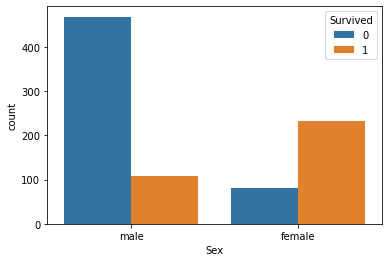

In [18]:
sns.countplot(x="Sex", hue = "Survived", data=train)
plt.show()#生存率を性別で比較

In [19]:
#男性の方が圧倒的に死亡率が高かった

In [20]:
pd.crosstab(train["Survived"]==1, train["Sex"])#上のグラフをテーブルで表示

Sex,female,male
Survived,,
False,81,468
True,233,109


In [21]:
#結果的に女性の生存率は男性のに比べ明らかに高かった。性別は生存率に大きく影響すると言える

### Age

In [22]:
titanic_age = train[["Age", "Survived"]]#AgeとSurvivedを抽出

In [23]:
titanic_age.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [24]:
titanic_age.describe()

,Age,Survived
count,714.000000,891.000000
mean,29.699118,0.383838
std,14.526497,0.486592
min,0.420000,0.000000
25%,20.125000,0.000000
50%,28.000000,0.000000
75%,38.000000,1.000000
max,80.000000,1.000000


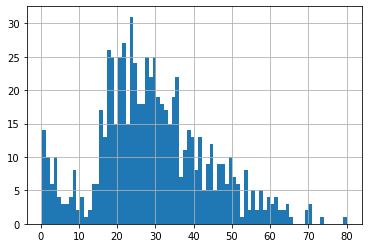

In [25]:
train["Age"].hist(bins=80)
plt.show()#年齢層をhistogramで可視化

In [26]:
titanic_age_survived = titanic_age[titanic_age["Survived"]==0]

In [27]:
titanic_age_survived.describe()#死者の平均年齢

,Age,Survived
count,424.000000,549.0
mean,30.626179,0.0
std,14.172110,0.0
min,1.000000,0.0
25%,21.000000,0.0
50%,28.000000,0.0
75%,39.000000,0.0
max,74.000000,0.0


In [28]:
titanic_age_deceased = titanic_age[titanic_age["Survived"]==1]

In [29]:
titanic_age_deceased.describe()#生存者の平均年齢

,Age,Survived
count,290.000000,342.0
mean,28.343690,1.0
std,14.950952,0.0
min,0.420000,1.0
25%,19.000000,1.0
50%,28.000000,1.0
75%,36.000000,1.0
max,80.000000,1.0


In [30]:
#死者の平均年齢が　30.6歳、生存者の平均年齢は　28.3歳。わずかだか若い方が生存率が高い。

In [31]:
titanic_age_children = titanic_age[titanic_age["Age"]<=13]#子供のデータだけを抽出（子供は１３歳以下と仮定）

In [32]:
len(titanic_age_children["Survived"])

71

In [33]:
len(titanic_age_children[titanic_age_children["Survived"]==1])

42

In [34]:
42/71

0.5915492957746479

In [35]:
len(train["Survived"])

891

In [36]:
len(train[train["Survived"]==1])

342

In [37]:
342/891

0.3838383838383838

In [38]:
#子供(１３歳以下）の生存率は 59%。全体生存率は38%。明らかに子供の方が生存率は高い

In [39]:
titanic_little = titanic_age[titanic_age["Age"]<=5]#５歳以下の子供のデータを抽出

In [40]:
len(titanic_little)

44

In [41]:
len(titanic_little[titanic_little["Survived"]==1])

31

In [42]:
31/44

0.7045454545454546

In [43]:
#５歳以下の子供に限定すると生存率は　70.4%。小さな子供の避難を優先していたと思われる

### SibSp

In [44]:
titanic_sibsp = train[["SibSp", "Survived"]]#SibspとSurvivedを抽出

In [45]:
titanic_sibsp.head()

,SibSp,Survived
0,1,0
1,1,1
2,0,1
3,1,1
4,0,0


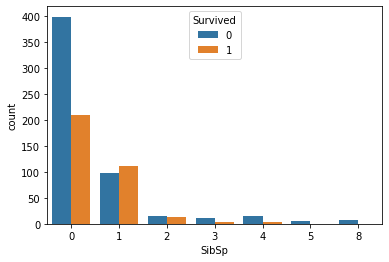

In [46]:
sns.countplot(x="SibSp", hue="Survived", data=train)#SibSpの数と生存率を可視化
plt.show()

In [47]:
titanic_sibsp_0 = titanic_sibsp[titanic_sibsp["SibSp"]==0]#兄弟、または配偶者が０人のデータを抽出

In [48]:
len(titanic_sibsp_0)

608

In [49]:
len(titanic_sibsp_0[titanic_sibsp_0["Survived"]==1])

210

In [50]:
210/608

0.34539473684210525

In [51]:
#兄弟、または配偶者が０人だった場合の生存率は 34.5%

In [52]:
titanic_sibsp_true = titanic_sibsp[titanic_sibsp["SibSp"]>=1]

In [53]:
len(titanic_sibsp_true)

283

In [54]:
len(titanic_sibsp_true[titanic_sibsp_true["Survived"]==1])

132

In [55]:
132/283

0.4664310954063604

In [56]:
#兄弟、または配偶者が１人以上だった場合の生存率は 46.6%.明らかにSibSpがいない人より生存率が高い

In [57]:
titanic_sibsp_more = titanic_sibsp[titanic_sibsp["SibSp"]>=2]#兄弟、または配偶者が２人以上のデータを抽出

In [58]:
len(titanic_sibsp_more)

74

In [59]:
len(titanic_sibsp_more[titanic_sibsp_more["Survived"]==1])

20

In [60]:
20/74

0.2702702702702703

In [61]:
#兄弟、または配偶者が２人以上の場合の生存率は　27.0%と1人の場合よりかなり低い。全員助かろうとしたしたせいで生存率が低いのかもしれない
#結果的にSibSpが1人の場合の生存率が一番高い

### Parch

In [62]:
titanic_parch = train[["Parch","Survived"]]#ParchとSurvivedを抽出

In [63]:
titanic_parch.head()

,Parch,Survived
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0


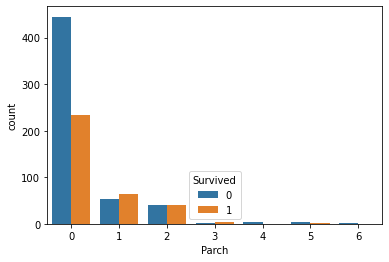

In [64]:
sns.countplot(x="Parch", hue="Survived", data=titanic_parch)
plt.show()

In [65]:
titanic_parch_0 = titanic_parch[titanic_parch["Parch"]==0]#親、または子供が０人のデータを抽出

In [66]:
len(titanic_parch_0)

678

In [67]:
len(titanic_parch_0[titanic_parch_0["Survived"]==1])

233

In [68]:
233/678

0.34365781710914456

In [69]:
#親、または子供が０人の場合の生存率は 34.3%

In [70]:
titanic_parch_true = titanic_parch[titanic_parch["Parch"]==1]#親、または子供が１人のデータを抽出

In [71]:
len(titanic_parch_true)

118

In [72]:
len(titanic_parch_true[titanic_parch_true["Survived"]==1])

65

In [73]:
65/118

0.5508474576271186

In [74]:
#親、または子供が１人の場合の生存率は 55.1%。Parchがいない人よりかなり高い。上記のグラフを見る限り、Parch1人の方が２人より生存率が高い

In [75]:
#女性でParch(主に子供と仮定)がいた場合生存率は上がるのか（一緒に避難した可能性がある）

In [76]:
titanic_parch_sex = train[["Survived","Parch","Sex"]]#生存率、Parch, Sexのデータを抽出

In [77]:
titanic_parch_sex.head()

,Survived,Parch,Sex
0,0,0,male
1,1,0,female
2,1,0,female
3,1,0,female
4,0,0,male


In [78]:
titanic_parch_women = titanic_parch_sex[titanic_parch_sex["Sex"]=="female"]#女性だけに限定

In [79]:
titanic_parch_women

,Survived,Parch,Sex
1,1,0,female
2,1,0,female
3,1,0,female
8,1,2,female
9,1,0,female
...,...,...,...
880,1,1,female
882,0,0,female
885,0,5,female
887,1,0,female


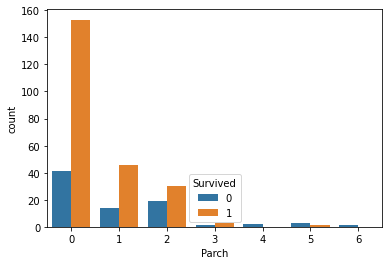

In [80]:
sns.countplot(x="Parch", hue="Survived", data=titanic_parch_women.drop(["Sex"],axis =1))
plt.show()#女性のParchがいた場合の生存率を可視化

In [81]:
titanic_parch_women_0 = titanic_parch_women[titanic_parch_women["Parch"]==0]#子供、または親が０人の女性のデータを抽出

In [82]:
len(titanic_parch_women_0)

194

In [83]:
len(titanic_parch_women_0[titanic_parch_women_0["Survived"]==1])

153

In [84]:
153/194

0.788659793814433

In [85]:
#女性で子供、または親がいない場合の生存率は　78.9%と今までで一番高い。

In [86]:
titanic_parch_women_1 = titanic_parch_women[titanic_parch_women["Parch"]==1]#子供、または親が１人の女性のデータを抽出

In [87]:
len(titanic_parch_women_1)

60

In [88]:
len(titanic_parch_women_1[titanic_parch_women_1["Survived"]==1])

46

In [89]:
46/60

0.7666666666666667

In [90]:
#女性で子供、または親がいない場合の生存率は 76.6%とParchがいない場合とさほど変わらない
#Parchが子供だと仮定した場合（親と乗船する確率は高くない気がする）、子供と女性の避難の優先度は変わらなかったのかもしれない

### Ticket Number

In [91]:
titanic_tickets = train[["Ticket", "Survived", "Pclass"]]

In [92]:
titanic_tickets.head(15)

,Ticket,Survived,Pclass
0,A/5 21171,0,3
1,PC 17599,1,1
2,STON/O2. 3101282,1,3
3,113803,1,1
4,373450,0,3
5,330877,0,3
6,17463,0,1
7,349909,0,3
8,347742,1,3
9,237736,1,2


In [93]:
#あまり一貫性がないと思われる。後から何か重要だったらちょっと悔しい。だか取り敢えず生存率に影響はないと仮定

### Fare

In [94]:
titanic_fare = train[["Survived", "Fare", "Pclass"]]#チケットの値段、生存率、Pclassを抽出

In [95]:
titanic_fare

,Survived,Fare,Pclass
0,0,7.2500,3
1,1,71.2833,1
2,1,7.9250,3
3,1,53.1000,1
4,0,8.0500,3
...,...,...,...
886,0,13.0000,2
887,1,30.0000,1
888,0,23.4500,3
889,1,30.0000,1


In [96]:
titanic_fare_sorted = titanic_fare.sort_values("Fare", ascending = False)

In [97]:
titanic_fare_sorted.head(15)

,Survived,Fare,Pclass
258,1,512.3292,1
737,1,512.3292,1
679,1,512.3292,1
88,1,263.0000,1
27,0,263.0000,1
341,1,263.0000,1
438,0,263.0000,1
311,1,262.3750,1
742,1,262.3750,1
118,0,247.5208,1


In [98]:
#チケットの値段とPclassが関係していることからPclassと同じような結果が予想される

In [99]:
titanic_fare_sorted.describe()

,Survived,Fare,Pclass
count,891.000000,891.000000,891.000000
mean,0.383838,32.204208,2.308642
std,0.486592,49.693429,0.836071
min,0.000000,0.000000,1.000000
25%,0.000000,7.910400,2.000000
50%,0.000000,14.454200,3.000000
75%,1.000000,31.000000,3.000000
max,1.000000,512.329200,3.000000


In [100]:
#チケット代の平均が 32.2で最高額が 512。

In [101]:
pd.crosstab(train["Survived"]==1, train["Fare"]>=32)#チケット代に合わせた生存率を計算

Fare,False,True
Survived,,
False,464,85
True,216,126


In [102]:
126/211#平均以上のチケット代の人の生存率

0.5971563981042654

In [103]:
216/680#平均以下のチケット代の人の生存率

0.3176470588235294

In [104]:
#平均以上のチケット代を払った人の方が断然生存率は高い。
#しかしこれは半分に分けるだけじゃなく、もっと小さなインクリメントで割ったらもっとわかるかもしれない。

### Embarked

In [105]:
titanic_embarked = train[["Survived","Embarked"]]#乗船した場所と生存率のデータを抽出

In [106]:
titanic_embarked.head()

,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S


In [107]:
pd.crosstab(titanic_embarked["Survived"]==1, titanic_embarked["Embarked"])#乗船した場所に応じての生存率

Embarked,C,Q,S
Survived,,,
False,75,47,427
True,93,30,217


In [108]:
217/644

0.33695652173913043

In [109]:
#South hampton(S)で乗船した人の生存率は 33.7%

In [110]:
30/77

0.38961038961038963

In [111]:
#Queenstown(Q)で乗船した人の生存率は 39.0%#South hampton(S)で乗船した人の生存率は 33.7%

In [112]:
93/168

0.5535714285714286

In [113]:
#Cherbourg(C)で乗船した人の生存率は 55.4%

In [114]:
#結果的にCherbourgで乗船した人の生存率が圧倒的に高いので、他に関連するかもしれないカテゴリーを使い見比べる

In [115]:
titanic_embarked_fare = train[["Embarked","Fare"]]#乗船した場所とチケットの値段のデータを抽出

In [116]:
titanic_embarked_fare.head()

,Embarked,Fare
0,S,7.2500
1,C,71.2833
2,S,7.9250
3,S,53.1000
4,S,8.0500


In [117]:
titanic_embarked_C = titanic_embarked_fare[titanic_embarked_fare["Embarked"]=="C"]#Cherbourgの客だけを抽出

In [118]:
titanic_embarked_C.describe()

,Fare
count,168.000000
mean,59.954144
std,83.912994
min,4.012500
25%,13.697950
50%,29.700000
75%,78.500025
max,512.329200


In [119]:
#チケット代の平均が 59.95と全体の平均よりだいぶ高い。乗船した場所よりは、Cherbourgで乗った人にお金持ちが多かっただけかもしれない

In [120]:
titanic_embarked_S = titanic_embarked_fare[titanic_embarked_fare["Embarked"]=="S"]#South hamptonの客だけを抽出

In [121]:
titanic_embarked_S.describe()

,Fare
count,644.000000
mean,27.079812
std,35.887993
min,0.000000
25%,8.050000
50%,13.000000
75%,27.900000
max,263.000000


In [122]:
titanic_embarked_Q = titanic_embarked_fare[titanic_embarked_fare["Embarked"]=="Q"]#Queenstownの客だけを抽出

In [123]:
titanic_embarked_Q.describe()

,Fare
count,77.000000
mean,13.276030
std,14.188047
min,6.750000
25%,7.750000
50%,7.750000
75%,15.500000
max,90.000000


In [124]:
#Cherbourg(C)で乗船した人の生存率は 55.4%。チケット代の平均が　59.95
#Queenstown(Q)で乗船した人の生存率は 39.0%。チケット代の平均が　27.07
#South hampton(S)で乗船した人の生存率は 33.7%。チケット代の平均が　13.3

In [126]:
#結果的に乗船した場所は関係なく、チケット代に左右されていただけであった

# 結果

In [132]:
# Pclass: 
#    Pclassが低い方が明らかに生存率は高い(1 > 2 > 3)。
#    Pclassが低い方が優先されたか、高いPclassだと部屋が船の下の方にあり逃げ遅れたのかもしれない

# Sex: 
#    女性の方が明らかに生存率は高い。救命ボートに乗る際に優先されたと思われる

# Age
#    生存者の平均年齢はの方がわずかだが死者の平均年齢より低かった。
#    しかし、これは年寄りほど助かりづらいと言うよりは子供の生存率が圧倒的に高い
#    子供(１３歳以下）の生存率は 59%。全体の生存率は38%　
#    ５歳以下の子供に限定すると生存率は　70.4%とさらに上がった。小さな子供の避難を優先していたと思われる 

#SibSp
#    結果的に兄弟、または配偶者が1人の場合の生存率が一番高い
#    兄弟、または配偶者が０人だった場合の生存率は 34.5%
#    兄弟、または配偶者が２人以上の場合の生存率は　27.0%と1人の場合よりかなり低い。全員助かろうとしたしたせいで生存率が低いのかもしれない

#Parch
#    親、または子供が１人の場合の生存率は 55.1%。Parchがいない人よりかなり高い
#    親、または子供が０人の場合の生存率は 34.3%
#    女性でParch = 0とParch = 1の生存率を比較したところ、生存率はほぼ同じだった
#    このことから、子供と女性の避難の優先度は変わらなかったのかもしれない
#    上記の計算はParchが子供だと仮定した（親と乗船する確率は高くない気がする）

#Ticket Number
#   　あまり一貫性がなく、多分生存率に影響を与えない

#Fare
#    チケット代の平均以上を払った人の方が断然生存率は高い。これはPclassとも関連していると思われる
#    しかしこれは半分に分けるだけじゃなく、もっと小さなインクリメントで割ったらもっとわかるかもしれない。(例えば５０単位)

#Embarked
#    Cherbourg(C)で乗船した人の生存率が圧倒的に高かった
#    だか、調べた結果これはCherbourgで乗った人の多くがお金持ちでいいチケットを買っていたことが原因と思われる
